In [26]:
import pandas as pd
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Download necessary NLTK resources
nltk.download('stopwords')

# Load the dataset using pd.read_excel()
df = pd.read_excel('./Lab9_Dataset.xlsx', keep_default_na=False)

# Display the first few rows
print(df.head())

 # Plotly histogram of sentiment distribution
fig = px.histogram(df, x="sentiment", title="Sentiment Distribution")
fig.show()

    # Generate stop words list
    stop_words = set(stopwords.words('english'))

    # Function to generate word clouds
    def generate_wordcloud(text, title):
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(' '.join(text))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()

    # Separate positive and negative reviews
    positive_reviews = df[df['sentiment'] == 'positive']['review']
    negative_reviews = df[df['sentiment'] == 'negative']['review']

    # Generate word clouds
    generate_wordcloud(positive_reviews, "Positive Word Cloud")
    generate_wordcloud(negative_reviews, "Negative Word Cloud")

    # Train-test split (70/30)
    X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.3, random_state=42) # corrected line

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_vectorized, y_train)

    # Predictions
    y_pred = model.predict(X_test_vectorized)

    # Error analysis
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

IndentationError: unexpected indent (1160017918.py, line 27)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alayn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


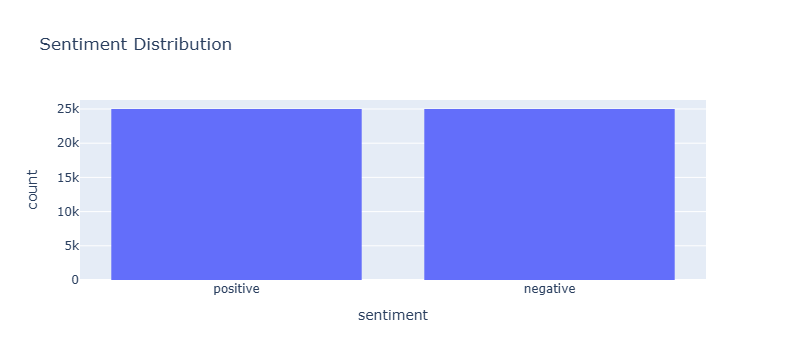

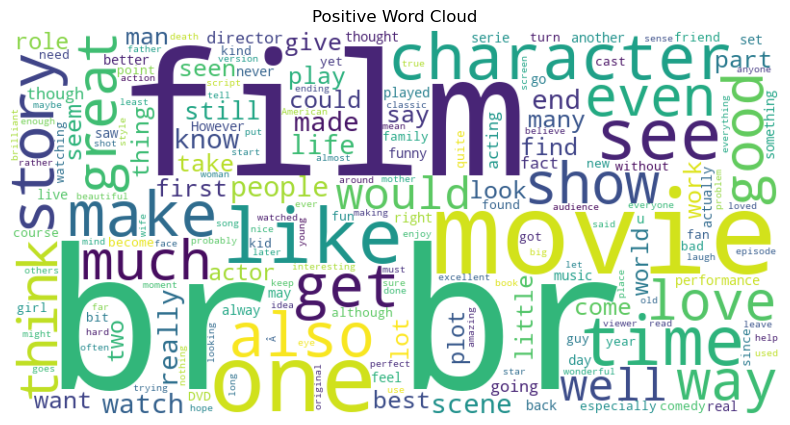

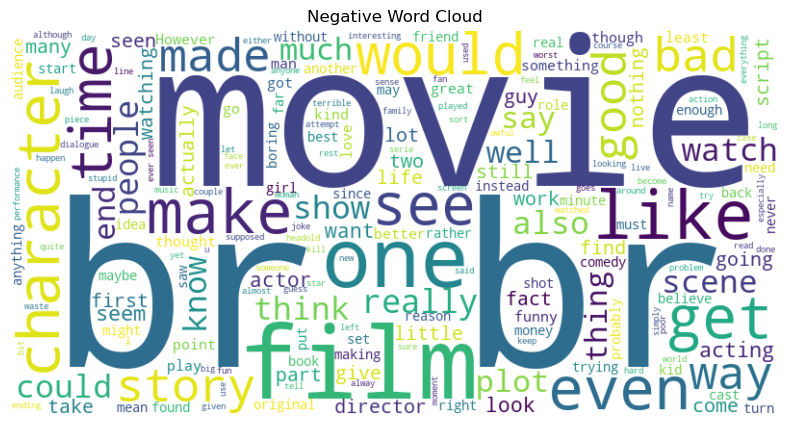

Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7411
    positive       0.88      0.91      0.90      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



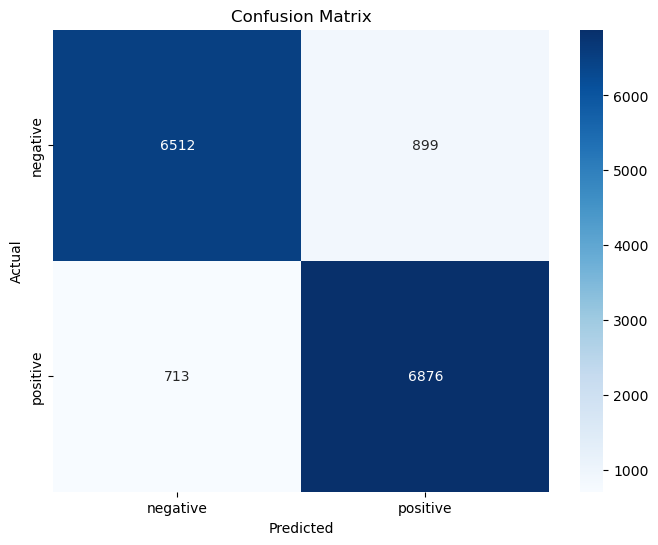

In [28]:
import pandas as pd
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Download necessary NLTK resources
nltk.download('stopwords')

# Load the dataset using pd.read_excel()
try:
    df = pd.read_excel('./Lab9_Dataset.xlsx', keep_default_na=False)

    # Display the first few rows
    print(df.head())

    # Plotly histogram of sentiment distribution
    fig = px.histogram(df, x="sentiment", title="Sentiment Distribution")
    fig.show()

    # Generate stop words list
    stop_words = set(stopwords.words('english'))

    # Function to generate word clouds
    def generate_wordcloud(text, title):
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(' '.join(text))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()

    # Separate positive and negative reviews
    positive_reviews = df[df['sentiment'] == 'positive']['review']
    negative_reviews = df[df['sentiment'] == 'negative']['review']

    # Generate word clouds
    generate_wordcloud(positive_reviews, "Positive Word Cloud")
    generate_wordcloud(negative_reviews, "Negative Word Cloud")

    # Train-test split (70/30)
    X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.3, random_state=42)

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_vectorized, y_train)

    # Predictions
    y_pred = model.predict(X_test_vectorized)

    # Error analysis
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")